In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pabutools.election import parse_pabulib
from pabutools.election import ApprovalBallot, Ballot
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.manifold import TSNE


# This document is an investigation into clustering on pb voting sets

In [34]:
# Get the voter data from the election
# instance, profile = parse_pabulib("elections/poland_wroclaw_2018_.pb")
# instance, profile = parse_pabulib("elections/poland_warszawa_2019_obszar-iii-powsin-kepa-latoszkowa-zamosc-latoszki.pb")
# instance, profile = parse_pabulib("elections/poland_wroclaw_2015_150-500.pb") 
# instance, profile = parse_pabulib("elections/artificial_mechanical-turk_k-approval-6_.pb")



ballots = []
for ballot in profile:
    ballots.append(list(ballot))

In [35]:
def show_scatter(data_2d):

    # Plotting the clusters
    plt.figure(figsize=(8, 6))
    
    # Scatter plot of the data points, coloring them based on the cluster they belong to
    plt.scatter(data_2d[:, 0], data_2d[:, 1], label=f'Data')
    

    # plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', marker='X', label='Centroids')
    
    plt.title('Identifying Clusters')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.show()

In [36]:
# One-hot encode the votes to represent then in the same dimensionality, then transform the vectors into real values
def encode_transform(data):
    mlb = MultiLabelBinarizer()
    data = mlb.fit_transform(ballots)
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    return tsne.fit_transform(data)


C:\Users\leonc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\leonc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


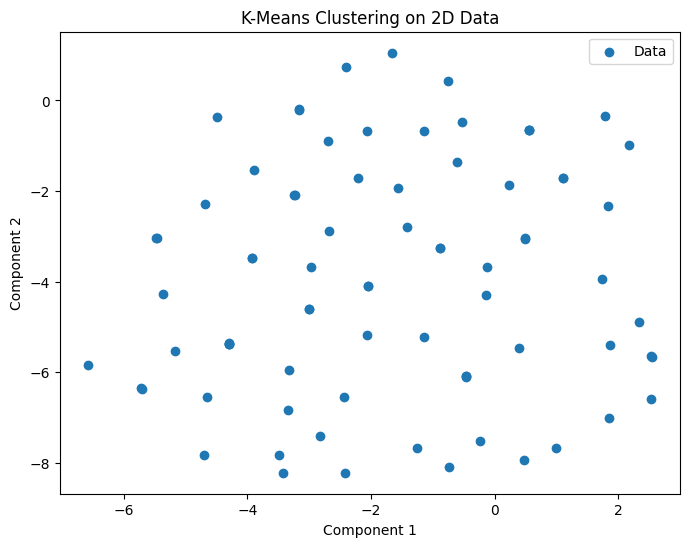

In [37]:
# This is something you'd have to decide based on domain knowledge or techniques like the elbow method

def kmeans(data_2d, k):
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(data_2d)
    
    # Plotting the clusters
    plt.figure(figsize=(8, 6))
    
    # Scatter plot of the data points, coloring them based on the cluster they belong to
    plt.scatter(data_2d[:, 0], data_2d[:, 1], label=f'Data')
    

    # plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', marker='X', label='Centroids')
    
    plt.title('K-Means Clustering on 2D Data')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.show()
kmeans(encode_transform(ballots),6)


In [30]:
# Now we try the same with a dataset of 50,000 votes
data_2d = encode_transform(ballots)

C:\Users\leonc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\leonc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


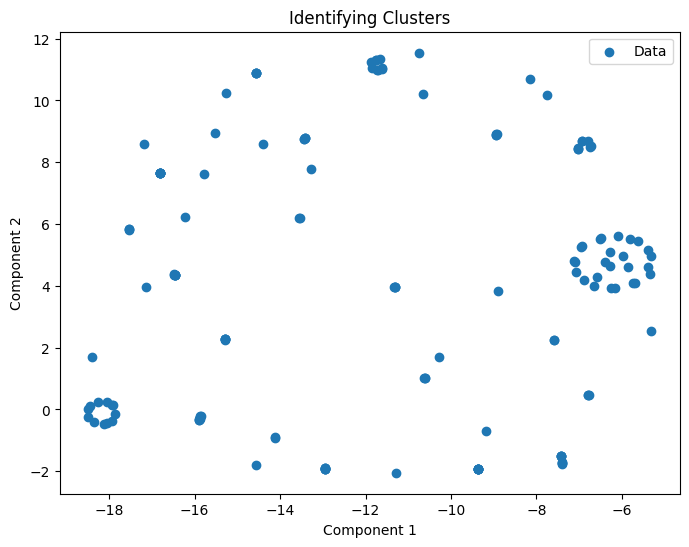

In [31]:

show_scatter(data_2d)

# DBSCAN Algorithm

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame(ballots)

# One-hot encode the data
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df.fillna(0)).toarray()
# Create an instance of DBSCAN
db = DBSCAN(eps=0.5, min_samples=5)  # eps and min_samples need to be chosen appropriately
db.fit(encoded_data)


DBSCAN()

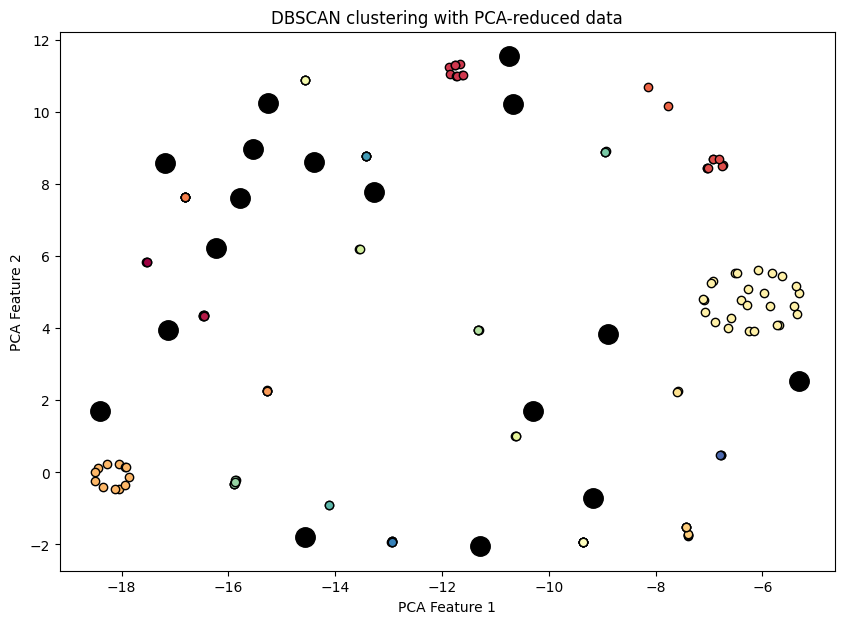

In [33]:
# Standardize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(encoded_data)

# Reduce the data to two dimensions using PCA
pca = PCA(n_components=2)
# X_pca = pca.fit_transform(data_2d)

# Apply DBSCAN
db = DBSCAN(eps=0.75, min_samples=2)
clusters = db.fit_predict(data_2d)

# Plot the PCA-reduced data
plt.figure(figsize=(10, 7))

# Scatter plot for clusters
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (clusters == k)

    xy = data_2d[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14 if k == -1 else 6)

plt.title('DBSCAN clustering with PCA-reduced data')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')

# Show the plot
plt.show()